In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [7]:
data = pd.read_csv('data.csv', header = None)

In [8]:
data.head()

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [15]:
dataa = data.values.reshape(-1)

In [16]:
dataa.shape

(138,)

In [20]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None

In [21]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in dataa]

In [22]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [23]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

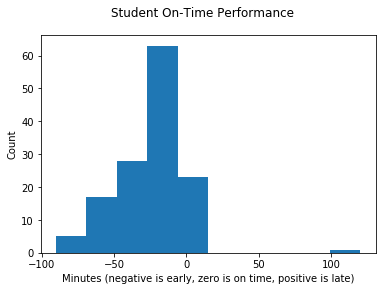

In [24]:
fig, ax = plt.subplots()
ax.hist(y)  # Use the default number of bins
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

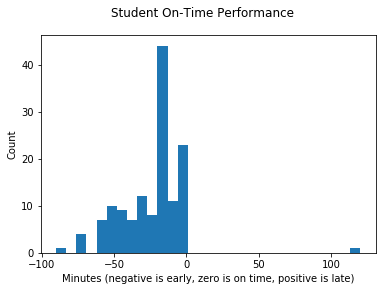

In [27]:
fig, ax = plt.subplots()
ax.hist(y, bins=30)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

# Observations
- The distribution of our arrival time is not normally distributed, and is rather left-skewed 
- makes sense because we all want to be either on time or early, and the cut off for being late is 0. All points except from one is one time with the mode appearing to be around ~ 15-20 minutes!

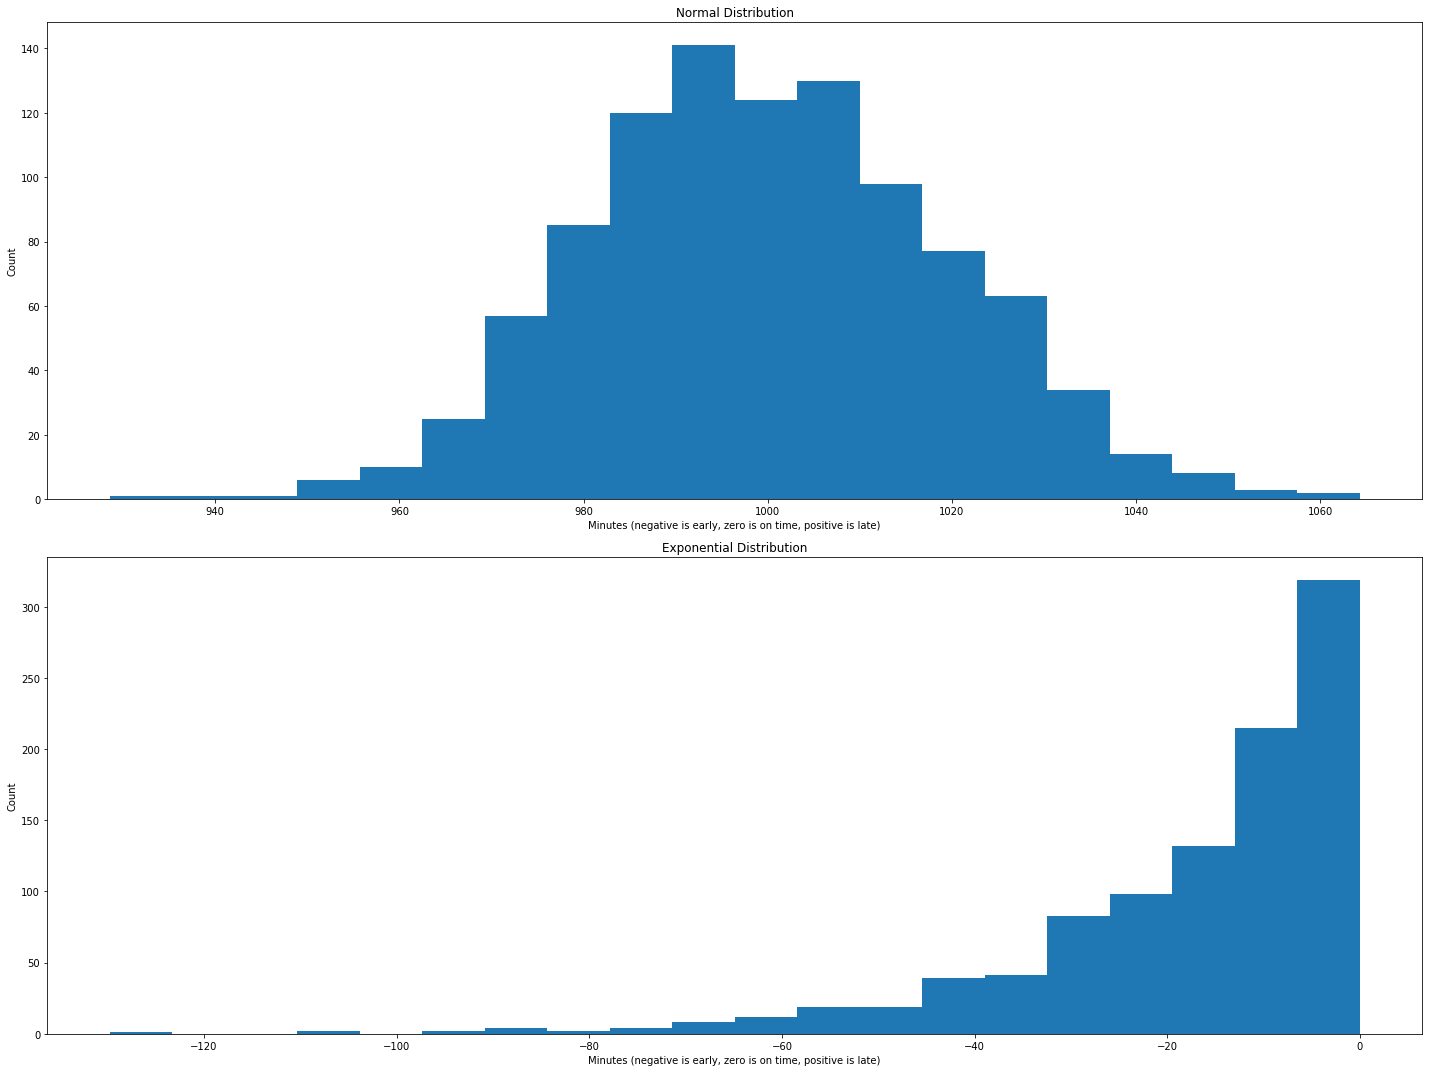

In [52]:
from scipy import stats

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Create some fake data with a normal distribution
normal_dist = stats.norm(loc=1000, scale=19)
fake_y = normal_dist.rvs(1000)  

# Plot the data from the normal distribution
ax = axs[0]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Normal Distribution")

# Create some fake data with an exponential distribution
exponential_dist = stats.expon(loc=0, scale=18)
fake_y = exponential_dist.rvs(1000)  

# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(-fake_y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Exponential Distribution")

# Show the plots
plt.tight_layout()
plt.show()

## Obvervations
- By altering the scale and loc variables within the stats.expon function, I was able to closely replicate the data of our cohort's arrival time! So I was wrong by saying earlier it was a normal distriubtuion with a left skewed, but more it is exponentially distributed. 